# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in the suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


In [89]:
# Step one: load the data(which is stored in the file train.csv)
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [90]:
# Step two:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [91]:
# Step two: Use built-in python functions to explore measures of centrality 
# and dispersion for at least 3 variables
display(df.describe())
# note that measures of centrality are mean, median, and mode
# note that measures of dispersion are variance, standard deviation, and interquartile range

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [92]:
# Step two continued
# My three variables are, crim, tax, and ptratio -- measures of centrality
print("crim mean:", round(df.crim.mean(), 3))
print("crim median:", round(df.crim.median(), 3))
print("crim mode:", df.crim.mode())
print("------------------------")
print("tax mean:", round(df.tax.mean(), 3))
print("tax median:", int(df.tax.median()))
print("tax mode:", df.tax.mode())
print("------------------------")
print("ptratio mean:", round(df.ptratio.mean(), 3))
print("ptratio median:", int(df.ptratio.median()))
print("ptratio mode:", df.ptratio.mode())

crim mean: 3.36
crim median: 0.262
crim mode: 0    0.01501
dtype: float64
------------------------
tax mean: 409.279
tax median: 330
tax mode: 0    666
dtype: int64
------------------------
ptratio mean: 18.448
ptratio median: 19
ptratio mode: 0    20.2
dtype: float64


In [93]:
# Step two continued
# My three variables are, crim, tax, and ptratio -- measures of dispersion
print("crim variance:", round(df.crim.var(), 3))
print("crim standard deviation:", round(df.crim.std(), 3))
print("crim 25th:", df.crim.quantile(.25))
print("crim 75th:", round(df.crim.quantile(.75), 3))
print("-------------------------------")
print("tax variance:", round(df.tax.var(), 3))
print("tax standard deviation:", round(df.tax.std(), 3))
print("tax 25th:", df.tax.quantile(.25))
print("tax 75th:", round(df.tax.quantile(.75), 3))
print("-------------------------------")
print("ptratio variance:", round(df.ptratio.var(), 3))
print("ptratio standard deviation:", round(df.ptratio.std(), 3))
print("ptratio 25th:", df.ptratio.quantile(.25))
print("ptratio 75th:", round(df.ptratio.quantile(.75), 3))

crim variance: 54.056
crim standard deviation: 7.352
crim 25th: 0.07896
crim 75th: 3.678
-------------------------------
tax variance: 29186.985
tax standard deviation: 170.842
tax 25th: 279.0
tax 75th: 666.0
-------------------------------
ptratio variance: 4.63
ptratio standard deviation: 2.152
ptratio 25th: 17.4
ptratio 75th: 20.2


In [94]:
# Step three: Create meaningful subsets of the data using selection operations 
# like .loc, .iloc or related operations. Explain why you used the chosen subsets 
# and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality 
# and/or dispersion might be different for each subset of the data. 
# Examples of potential splits:
# -- Create 2 new dataframes based on your existing data, where one contains all the 
# properties next to the Charles river, and the other one contains properties that aren't.
# -- Create 2 new dataframes based on a certain split for crime rate.

In [95]:
Charles_River = df.loc[df['chas']==1]
Charles_River
# properties that are next to Charles River because chas = 1
# according to the variable description

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.8710,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,155,1.41385,0.0,19.58,1,0.8710,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,161,1.27346,0.0,19.58,1,0.6050,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,209,0.13587,0.0,10.59,1,0.4890,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4
146,212,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3
149,217,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,392.80,13.51,23.3
150,222,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
151,223,0.62356,0.0,6.20,1,0.5070,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
161,235,0.44791,0.0,6.20,1,0.5070,6.726,66.5,3.6519,8,307,17.4,360.20,8.05,29.0


In [96]:
print("By River Per Capita Crime Rate Mean:", Charles_River.crim.mean())
print("By River Per Capita Crime Rate Median:", Charles_River.crim.median())
print("By River Per Capita Crime Rate Standard Deviation:", Charles_River.crim.std())

By River Per Capita Crime Rate Mean: 2.1639725
By River Per Capita Crime Rate Median: 0.5720700000000001
By River Per Capita Crime Rate Standard Deviation: 2.8857338202574456


In [97]:
print("By River Full-Value Property-Tax Rate Per $10,000 Mean:", Charles_River.tax.mean())
print("By River Full-Value Property-Tax Rate Per $10,000 Med:", Charles_River.tax.median())
print("By River Full-Value Property-Tax Rate Per $10,000 Std:", Charles_River.tax.std())

By River Full-Value Property-Tax Rate Per $10,000 Mean: 394.55
By River Full-Value Property-Tax Rate Per $10,000 Med: 307.0
By River Full-Value Property-Tax Rate Per $10,000 Std: 171.7950048290419


In [98]:
print("By River Pupil-Teacher Ratio By Town Mean:", Charles_River.ptratio.mean())
print("By River Pupil-Teacher Ratio By Town Med:", Charles_River.ptratio.median())
print("By River Pupil-Teacher Ratio By Town Std:", Charles_River.ptratio.std())

By River Pupil-Teacher Ratio By Town Mean: 17.384999999999998
By River Pupil-Teacher Ratio By Town Med: 17.4
By River Pupil-Teacher Ratio By Town Std: 2.2290604582011206


In [99]:
Not_Charles_River = df.loc[df['chas']==0]
Not_Charles_River
## properties that are not next to Charles River because chas = 0
# according to the variable description

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [100]:
print("Not by River Per Capita Crime Rate Mean:", Not_Charles_River.crim.mean())
print("Not by River Per Capita Crime Rate Median:", Not_Charles_River.crim.median())
print("Not by River Per Capita Crime Rate Standard Deviation:", Not_Charles_River.crim.std())

Not by River Per Capita Crime Rate Mean: 3.436786773162939
Not by River Per Capita Crime Rate Median: 0.24522
Not by River Per Capita Crime Rate Standard Deviation: 7.544288538815912


In [101]:
print("Not by River Full-Value Property-Tax Rate Per $10,000 Mean:", Not_Charles_River.tax.mean())
print("Not by River Full-Value Property-Tax Rate Per $10,000 Med:", Not_Charles_River.tax.median())
print("Not by River Full-Value Property-Tax Rate Per $10,000 Std:", Not_Charles_River.tax.std())

Not by River Full-Value Property-Tax Rate Per $10,000 Mean: 410.220447284345
Not by River Full-Value Property-Tax Rate Per $10,000 Med: 330.0
Not by River Full-Value Property-Tax Rate Per $10,000 Std: 171.0141862193334


In [102]:
print("Not by River Pupil-Teacher Ratio By Town Mean:", Not_Charles_River.ptratio.mean())
print("Not by River Pupil-Teacher Ratio By Town Med:", Not_Charles_River.ptratio.median())
print("Not by River Pupil-Teacher Ratio By Town Std:", Not_Charles_River.ptratio.std())

Not by River Pupil-Teacher Ratio By Town Mean: 18.515974440894567
Not by River Pupil-Teacher Ratio By Town Med: 19.1
Not by River Pupil-Teacher Ratio By Town Std: 2.1324869072519643


In [103]:
# What does this say?
# It shows that one, less people live by the river which coincides with
# the fact that there is less crime and less students in a classroom.
# The property taxes are also lower by the river.
# More people live away from the river (bigger area to fill), which
# increases the crime rate.  Since more people live in the larger area away from the river
# there are more students in the classroom as well.
# Taxes are higher away from the river.
# For the ratio of pupil per teacher, I used the median to determine a better
# idea of what it could be since there is more of Not than the other.

In [104]:
# Step four: Next, use histograms and scatter plots to see whether you 
# observe differences for the subsets of the data. 
# Make sure to use subplots so it is easy to compare the relationships.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

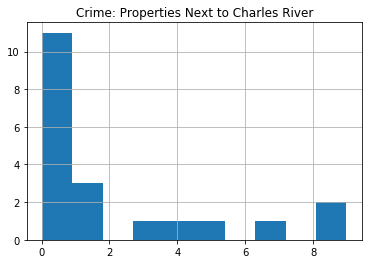

In [112]:
Charles_River.crim.hist()
plt.title('Crime: Properties Next to Charles River');


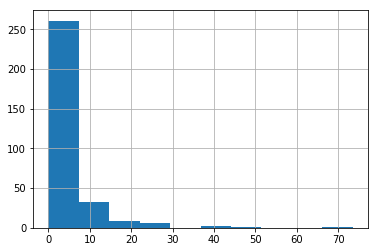

In [113]:
Not_Charles_River.crim.hist();
# this means that most crimes rates are below 10

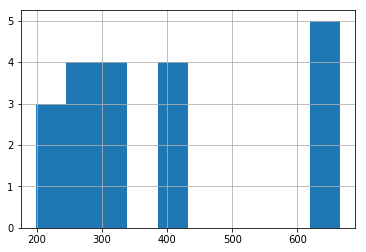

In [115]:
Charles_River.tax.hist()
plt.title('Distribution of Taxes per Property Bounding River')
plt.xlabel('Property Taxes')
plt.ylabel('Number of Houses');

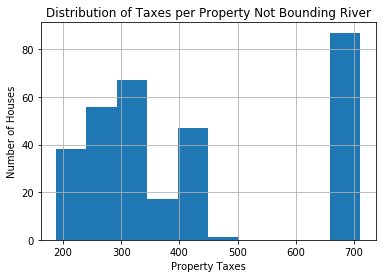

In [129]:
Not_Charles_River.tax.hist()
plt.title('Distribution of Taxes per Property Not Bounding River')
plt.xlabel('Property Taxes')
plt.ylabel('Number of Houses');
# this means that most houses are paying high taxes

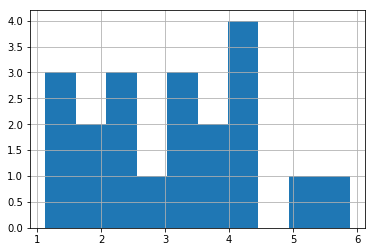

In [121]:
Charles_River.dis.hist();

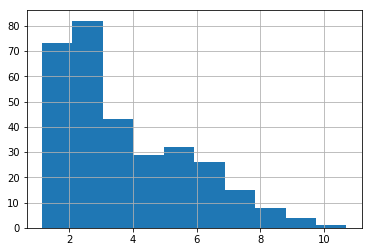

In [124]:
Not_Charles_River.dis.hist();

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular data set!